In [1]:
#import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.impute import SimpleImputer

##**Load the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

plays = pd.read_csv('/content/drive/Shareddrives/Final Project - CSC 461/plays.csv')
games = pd.read_csv('/content/drive/Shareddrives/Final Project - CSC 461/games.csv')
players = pd.read_csv('/content/drive/Shareddrives/Final Project - CSC 461/players.csv')
tackles = pd.read_csv('/content/drive/Shareddrives/Final Project - CSC 461/tackles.csv')

train_week1 = pd.read_csv('/content/drive/Shareddrives/Final Project - CSC 461/tracking_week_1.csv')
train_week2 = pd.read_csv('/content/drive/Shareddrives/Final Project - CSC 461/tracking_week_2.csv')

In [ ]:
print(plays.columns)

Index(['gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2'],
      dtype='object')


In [ ]:
print(f"Columns of 'players' : {players.columns}\n")
print(f"Columns of 'games' : {games.columns}\n")
print(f"Columns of 'tackles' : {tackles.columns}\n")
print(f"Columns of 'plays' : {plays.columns}\n")

Columns of 'players' : Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName'],
      dtype='object')

Columns of 'games' : Index(['gameId', 'season', 'week', 'gameDate', 'gameTimeEastern',
       'homeTeamAbbr', 'visitorTeamAbbr', 'homeFinalScore',
       'visitorFinalScore'],
      dtype='object')

Columns of 'tackles' : Index(['gameId', 'playId', 'nflId', 'tackle', 'assist', 'forcedFumble',
       'pff_missedTackle'],
      dtype='object')

Columns of 'plays' : Index(['gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSna

##**File Descriptions**


```
Game data: The games.csv contains the teams playing in each game. The key variable is gameId.
Play data: The plays.csv file contains play-level information from each game. The key variables are gameId and playId.
Player data: The players.csv file contains player-level information from players that participated in any of the tracking data files. The key variable is nflId.
Tackles data: The tackles.csv file contains player-level tackle information for each game and play. The key variables are gameId, playId, and nflId.
Tracking data: Files tracking_week_[week].csv contain player tracking data from week number [week]. The key variables are gameId, playId, and nflId.
```



###Game data

```
# gameId: Game identifier, unique (numeric)
season: Season of game
week: Week of game
gameDate: Game Date (time, mm/dd/yyyy)
gameTimeEastern: Start time of game (time, HH:MM:SS, EST)
homeTeamAbbr: Home team three-letter code (text)
visitorTeamAbbr: Visiting team three-letter code (text)
homeFinalScore: The total amount of points scored by the home team in the game (numeric)
visitorFinalScore: The total amount of points scored by the visiting team in the game (numeric)
```


###Play data

```
gameId: Game identifier, unique (numeric)
playId: Play identifier, not unique across games (numeric)
ballCarrierId: The nflId of the ball carrier (receiver of the handoff, receiver of pass or the QB scrambling) on the play. This is the player that the defense is attempting to tackle. (numeric)
ballCarrierName: The displayName of the ball carrier on the play (text)
playDescription: Description of play (text)
quarter: Game quarter (numeric)
down: Down (numeric)
yardsToGo: Distance needed for a first down (numeric)
possessionTeam: Team abbr of team on offense with possession of ball (text)
defensiveTeam: Team abbr of team on defense (text)
yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)
yardlineNumber: Yard line at line-of-scrimmage (numeric)
gameClock: Time on clock of play (MM:SS)
preSnapHomeScore: Home score prior to the play (numeric)
preSnapVisitorScore: Visiting team score prior to the play (numeric)
passResult: Dropback outcome of the play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, R: Scramble, text)
passLength: The distance beyond the LOS that the ball traveled not including yards into the endzone. If thrown behind LOS, the value is negative. (numeric)
penaltyYards: yards gained by offense by penalty (numeric)
prePenaltyPlayResult: Net yards gained by the offense, before penalty yardage (numeric)
playResult: Net yards gained by the offense, including penalty yardage (numeric)
playNullifiedByPenalty: Whether or not an accepted penalty on the play cancels the play outcome. Y stands for yes and N stands for no. (text)
absoluteYardlineNumber: Distance from end zone for possession team (numeric)
offenseFormation: Formation used by possession team (text)
defendersInTheBox: Number of defenders in close proximity to line-of-scrimmage (numeric)
passProbability: NGS probability of next play being pass (as opposed to rush) based off model without tracking data inputs (numeric)
preSnapHomeTeamWinProbability: The win probability of the home team before the play (numeric)
preSnapVisitorTeamWinProbability: The win probability of the visiting team before the play (numeric)
homeTeamWinProbabilityAdded: Win probability delta for home team (numeric)
visitorTeamWinProbabilityAdded: Win probability delta for visitor team (numeric)
expectedPoints: Expected points on this play (numeric)
expectedPointsAdded: Delta of expected points on this play (numeric)
foulName[i]: Name of the i-th penalty committed during the play. i ranges between 1 and 2 (text)
foulNFLId[i]: nflId of the player who comitted the i-th penalty during the play. i ranges between 1 and 2 (numeric)
```
###Player data

```
nflId: Player identification number, unique across players (numeric)
height: Player height (text)
weight: Player weight (numeric)
birthDate: Date of birth (YYYY-MM-DD)
collegeName: Player college (text)
position: Official player position (text)
displayName: Player name (text)
```
###Tackles data
```
gameId: Game identifier, unique (numeric)
playId: Play identifier, not unique across games (numeric)
nflId: Player identification number, unique across players (numeric)
tackle: Indicator for whether the given player made a tackle on the play (binary)
assist: Indicator for whether the given player made an assist tackle on the play (binary)
forcedFumble: Indicator for whether the given player forced a fumble on the play (binary)
pff_missedTackle: Provided by Pro Football Focus (PFF). Indicator for whether the given player missed a tackle on the play (binary)
```
###Tracking data
```
Files tracking_week_[week].csv contains player tracking data from week [week].

gameId: Game identifier, unique (numeric)
playId: Play identifier, not unique across games (numeric)
nflId: Player identification number, unique across players. When value is NA, row corresponds to ball. (numeric)
displayName: Player name (text)
frameId: Frame identifier for each play, starting at 1 (numeric)
time: Time stamp of play (time, yyyy-mm-dd, hh:mm:ss)
jerseyNumber: Jersey number of player (numeric)
club: Team abbrevation of corresponding player (text)
playDirection: Direction that the offense is moving (left or right)
x: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)
y: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric)
s: Speed in yards/second (numeric)
a: Speed in yards/second^2 (numeric)
dis: Distance traveled from prior time point, in yards (numeric)
o: Player orientation (deg), 0 - 360 degrees (numeric)
dir: Angle of player motion (deg), 0 - 360 degrees (numeric)
event: Tagged play details, including moment of ball snap, pass release, pass catch, tackle, etc (text)
```

##**Exploratory Data Analysis**

In [ ]:
for i in [players, games, tackles, plays]:
    print(i.describe(), '\n')

              nflId       weight
count   1683.000000  1683.000000
mean   48221.702317   245.724302
std     5217.040133    47.119299
min    25511.000000   153.000000
25%    44828.500000   205.000000
50%    47872.000000   236.000000
75%    53471.500000   290.000000
max    55241.000000   380.000000 

             gameId  season        week  homeFinalScore  visitorFinalScore
count  1.360000e+02   136.0  136.000000      136.000000         136.000000
mean   2.022099e+09  2022.0    4.845588       22.669118          20.948529
std    5.996614e+03     0.0    2.567254        8.659874           9.731446
min    2.022091e+09  2022.0    1.000000        3.000000           0.000000
25%    2.022093e+09  2022.0    3.000000       17.000000          14.750000
50%    2.022101e+09  2022.0    5.000000       22.500000          20.000000
75%    2.022102e+09  2022.0    7.000000       27.000000          27.000000
max    2.022111e+09  2022.0    9.000000       49.000000          48.000000 

             gameId     

9919
7507
Successful Tackles : 56.920693217032024%
Unsuccessful Tackles : 43.07930678296798%


([<matplotlib.patches.Wedge at 0x794d8117afb0>,
 [Text(-0.24159647469131948, 1.0936320877775703, 'Successful Tackles'),
  Text(0.24591080167533946, -1.1131612091783436, 'Unsuccessful Tackles')],
 [Text(-0.1337409056326947, 0.6054034771625834, '56.9%'),
  Text(0.1380551869054537, -0.6249326086615261, '43.1%')])

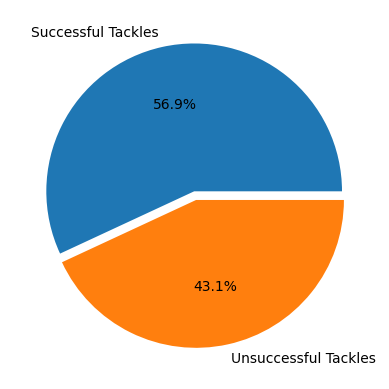

In [ ]:
import matplotlib.pyplot as plt

tackles_success = []
tackles_failed = []

for bin in tackles['tackle']:
    if bin == 1 : tackles_success.append(bin);
    else : tackles_failed.append(bin);

print( len(tackles_success) )
print( len(tackles_failed) )

pct_tackles_success = len(tackles_success)/len(tackles) * 100
pct_tackles_failed = len(tackles_failed)/len(tackles) * 100

print(f"Successful Tackles : {pct_tackles_success}%")
print(f"Unsuccessful Tackles : {pct_tackles_failed}%")

plt.pie(
    [pct_tackles_success, pct_tackles_failed],
    labels=['Successful Tackles', 'Unsuccessful Tackles'],
    autopct='%.1f%%',
    explode=[0.02, 0.04])

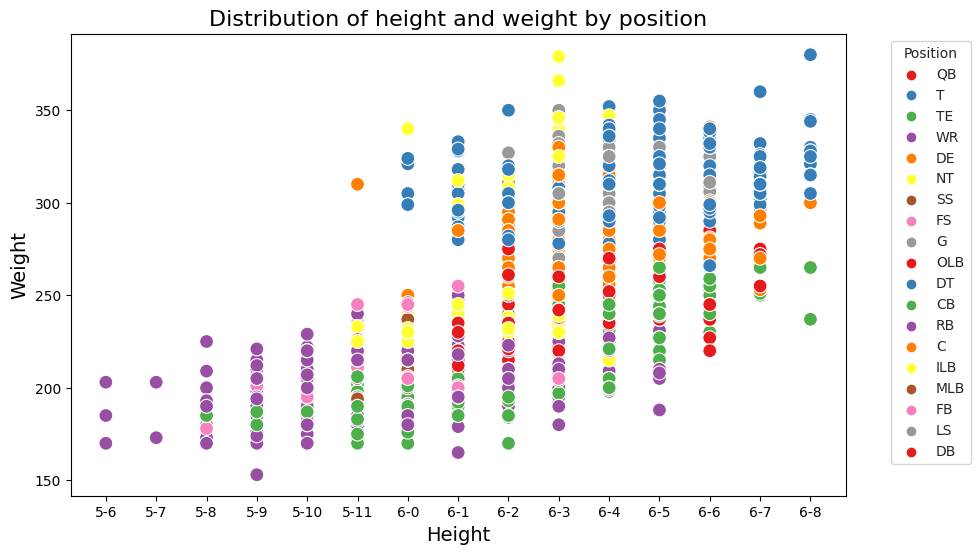

In [ ]:
import seaborn as sns

# height M-N: M Feet N inches
# weight (lbs)

plt.figure(figsize=(10, 6))
plt.title("Distribution of height and weight by position", fontsize=16)
sns.set_style('whitegrid')

# set order for height to be plotted in
players['height'] = pd.Categorical(players['height'], ['5-6','5-7','5-8','5-9', '5-10', '5-11', '6-0', '6-1', '6-2', '6-3', '6-4', '6-5', '6-6', '6-7', '6-8'])

# Assuming 'position' is the column in the players DataFrame containing position information
sns.scatterplot(
    x=players['height'],
    y=players['weight'],
    hue=players['position'],  # Specify the column for color mapping
    palette='Set1',  # You can choose a different color palette if desired
    s=100  # Set marker size if needed
)

plt.xlabel('Height', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#function to convert gameClock time
def convertTimeToNumerical(t):
    t = t.split(":")
    if len(t) == 2:
        return int(t[0]) * 60 + int(t[1])
    return int(t[0]) * 3600 + int(t[1]) * 60 + int(t[2])
#function to convert players height
def heightInches(h):
    temp = list(map(int, h.split('-')))
    return temp[0]*12 + temp[1]

##**Data Preprocessing**

In [ ]:
# Define a function to preprocess a dataframe
def preprocess(df):
    # Check for missing values
    print(f"Missing values in each column:\n{df.isnull().sum()}\n")

    # Fill missing values or drop rows/columns with missing values if necessary
    # df = df.fillna(value)
    # df = df.dropna()

    # Convert data types if necessary
    # df['column'] = df['column'].astype(type)

    # Print the first few rows to verify
    print(df.head())

# Preprocess each dataframe
print("Preprocessing games dataframe")
preprocess(games)

print("Preprocessing plays dataframe")
preprocess(plays)

print("Preprocessing players dataframe")
preprocess(players)

print("Preprocessing tackles dataframe")
preprocess(tackles)

print("Preprocessing week 1 tracking dataframe")
preprocess(train_week1)

print("Preprocessing week 2 tracking dataframe")
preprocess(train_week2)

Preprocessing games dataframe
Missing values in each column:
gameId               0
season               0
week                 0
gameDate             0
gameTimeEastern      0
homeTeamAbbr         0
visitorTeamAbbr      0
homeFinalScore       0
visitorFinalScore    0
dtype: int64

       gameId  season  week    gameDate gameTimeEastern homeTeamAbbr  \
0  2022090800    2022     1  09/08/2022        20:20:00           LA   
1  2022091100    2022     1  09/11/2022        13:00:00          ATL   
2  2022091101    2022     1  09/11/2022        13:00:00          CAR   
3  2022091102    2022     1  09/11/2022        13:00:00          CHI   
4  2022091103    2022     1  09/11/2022        13:00:00          CIN   

  visitorTeamAbbr  homeFinalScore  visitorFinalScore  
0             BUF              10                 31  
1              NO              26                 27  
2             CLE              24                 26  
3              SF              19                 10  
4         

##**Feature Engineering**

In [ ]:
# Import necessary libraries
from datetime import datetime

# Create new features
# Create a feature for the 'players' dataframe that represents the player's age:
players['age'] = datetime.now().year - pd.to_datetime(players['birthDate']).dt.year

# Create a feature for the 'games' dataframe that represents the total score:
games['totalScore'] = games['homeFinalScore'] + games['visitorFinalScore']

# Create a feature that represents the total yards gained:
plays['totalYards'] = plays['prePenaltyPlayResult'] + plays['penaltyYards']

# Create features that represent the player's movement:
train_week1['totalDistance'] = train_week1['s'] * train_week1['dis']
train_week1['totalAcceleration'] = train_week1['a'] * train_week1['dis']

###Player Statistics

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Convert height from string to numeric
players['height'] = players['height'].apply(lambda x: int(x.split('-')[0])*12 + int(x.split('-')[1]) if '-' in x else x)
players['height'] = players['height'].astype(float)

# Calculate age from birthDate
players['birthDate'] = pd.to_datetime(players['birthDate'])
players['age'] = (pd.to_datetime('today') - players['birthDate']).dt.days / 365

# Merge players and plays dataframes
df1 = pd.merge(plays, players, left_on='ballCarrierId', right_on='nflId', how='left')

# Calculate player game statistics
player_stats = df1.groupby('ballCarrierId').agg({
    'playId': 'count',  # Number of plays
    'playResult': ['mean', 'sum'],  # Average and total play results
    'passResult': lambda x: np.mean(x=='C'),  # Completion rate
    'height': 'first',  # Player height
    'weight': 'first',  # Player weight
    'age': 'first',  # Player age
})

# Rename columns
player_stats.columns = ['num_plays', 'avg_play_result', 'total_play_result', 'completion_rate', 'height', 'weight', 'age']

# Reset index
player_stats.reset_index(inplace=True)

print(player_stats.head())

   ballCarrierId  num_plays  avg_play_result  total_play_result  \
0          25511          4        -2.000000                 -8   
1          29851          7        10.571429                 74   
2          30842          1        19.000000                 19   
3          33084          8         2.000000                 16   
4          33099          2         3.500000                  7   

   completion_rate  height  weight        age  
0              0.0    76.0     225  46.408219  
1              0.0    74.0     225  40.073973  
2              1.0    78.0     267  39.610959  
3              0.0    76.0     217  38.616438  
4              0.0    78.0     245  38.947945  


###Team Statistics

In [ ]:
# Import necessary libraries
import pandas as pd

# Merge games and plays dataframes
df2 = pd.merge(plays, games, left_on='gameId', right_on='gameId', how='left')

# Calculate team game statistics
team_stats = df2.groupby(['season', 'week', 'possessionTeam']).agg({
    'playId': 'count',  # Number of plays
    'playResult': ['mean', 'sum'],  # Average and total play results
    'passResult': lambda x: np.mean(x=='C'),  # Completion rate
    'homeFinalScore': 'first',  # Home team final score
    'visitorFinalScore': 'first',  # Visitor team final score
})

# Rename columns
team_stats.columns = ['num_plays', 'avg_play_result', 'total_play_result', 'completion_rate', 'home_final_score', 'visitor_final_score']

# Reset index
team_stats.reset_index(inplace=True)

print(team_stats.head())

   season  week possessionTeam  num_plays  avg_play_result  total_play_result  \
0    2022     1            ARI         42         7.071429                297   
1    2022     1            ATL         58         7.275862                422   
2    2022     1            BAL         34         4.882353                166   
3    2022     1            BUF         46         8.782609                404   
4    2022     1            CAR         31         9.612903                298   

   completion_rate  home_final_score  visitor_final_score  
0         0.523810                21                   44  
1         0.344828                26                   27  
2         0.411765                 9                   24  
3         0.521739                10                   31  
4         0.516129                24                   26  


###Game Context

In [ ]:
# Import necessary libraries
import pandas as pd

# Merge games and plays dataframes
df3 = pd.merge(plays, games, left_on='gameId', right_on='gameId', how='left')

# Calculate the score difference before the play
plays['scoreDifferenceBeforePlay'] = df3['preSnapHomeScore'] - df3['preSnapVisitorScore']

# Calculate the time remaining in the game in seconds
plays['timeRemaining'] = df3['quarter'].apply(lambda x: (4-x)*15*60) + df3['gameClock'].str.split(':').apply(lambda x: int(x[0])*60 + int(x[1]))

# Calculate the yards remaining to the end zone
plays['yardsToGoal'] = 100 - df3['absoluteYardlineNumber']

print(plays[['scoreDifferenceBeforePlay', 'timeRemaining', 'yardsToGoal']].head())


   scoreDifferenceBeforePlay  timeRemaining  yardsToGoal
0                         14            472           31
1                         -6            458           24
2                          7           2337           60
3                          3           1692           53
4                          0           2313           25


###Derived Metrics

In [ ]:
# Calculate yards per attempt
plays['yardsPerAttempt'] = plays['passLength'].sum() / plays['passResult'].notnull().sum()

# Calculate touchdowns per attempt
plays['touchdownsPerAttempt'] = df['totalTouchdowns'] / plays['passResult'].notnull().sum()

# Calculate interceptions per attempt
plays['interceptionsPerAttempt'] = plays['passResult'].value_counts()['IN'] / plays['passResult'].notnull().sum()

NameError: ignored

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Merge plays and players dataframes
df = pd.merge(plays, players, left_on='ballCarrierId', right_on='nflId', how='left')

# Calculate the quarterback's passer rating
df['passerRating'] = ((team_stats['completion_rate'] - 0.3) * 5 + (df['yardsPerAttempt'] - 3) * 0.25 + (df['touchdownsPerAttempt'] * 20) + 2.375 - (df['interceptionsPerAttempt'] * 25)) / 6 * 100

# Create a metric that represents the defensive pressure
# For simplicity, let's assume 'defendersInTheBox' represents the defensive pressure
df['defensivePressure'] = df['defendersInTheBox'] / df['numberOfPassRushers']

print(df[['passerRating', 'defensivePressure']].head())

##**Model Selection and Training**

###Model Selection

###Train/Test Split

###Model Training

###Model Evaluation